In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import pandas as pd

reg_data = pd.read_csv("../results/medium_only_hypop/atomistic/results.csv")

# sort by test RMSE
reg_data.sort_values(by="result.av_test_rmse", inplace=True)

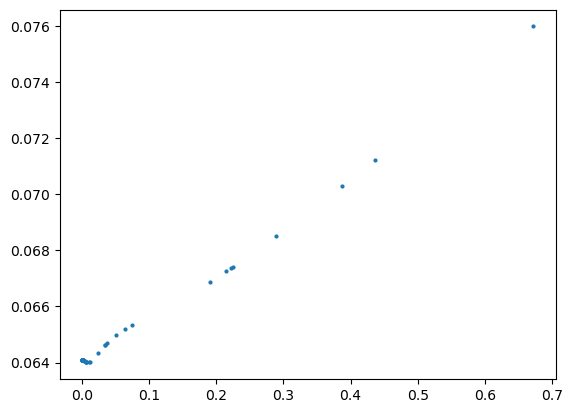

In [14]:
# plot noise vs test RMSE
noise = reg_data["config.noise"]
rmse = reg_data["result.av_test_rmse"]

import matplotlib.pyplot as plt
plt.plot(noise, rmse, "o",linewidth=0.5, markersize=2)

In [15]:
results_df = pd.read_csv("../results/medium_only_grid_search/atomistic/results.csv")

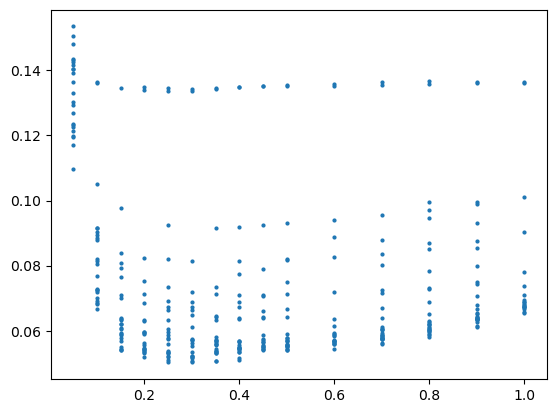

In [16]:
plt.plot(results_df["config.sigma"], results_df["result.av_test_rmse"], "o",linewidth=0.5, markersize=2)

In [9]:
sigmas = [
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.35,
    0.4,
    0.45,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    1.0,
    1.25,
    1.5,
    1.75,
    2,
]
cutoffs = [
    2.5,
    3,
    3.5,
    4,
    4.5,
    5,
    5.25,
    5.5,
    5.75,
    6,
    6.25,
    6.5,
    6.75,
    7,
    7.25,
    7.5,
    7.75,
    8,
    8.5,
    9,
    9.5,
    10,
    11,
    12,
    13,
    14,
    15,
]


In [10]:
# get the index of the above pairs that are missing from the grid search

from itertools import product

grid = list(product(sigmas, cutoffs))
# List to store the indices of failed jobs
failed_indices = []

# Check for each sigma-cutoff pair if it exists in the dataframe
for idx, (sigma, cutoff) in enumerate(grid):
    if not results_df[(results_df['config.sigma'] == sigma) & (results_df['config.cutoff'] == cutoff)].empty:
        # Pair exists in the dataframe, move to the next pair
        continue
    else:
        # Pair doesn't exist in the dataframe, add its index to the list of failed indices
        failed_indices.append(idx)

# Print the indices of the failed jobs
print("Indices of failed jobs:", failed_indices)

Indices of failed jobs: [5, 8, 9, 13, 31, 41, 42, 43, 52, 54, 62, 76, 83, 87, 93, 99, 105, 117, 118, 119, 128, 137, 141, 142, 143, 152, 154, 165, 175, 185, 197, 198, 210, 219, 227, 228, 229, 235, 236, 254, 259, 266, 281, 282, 283, 293, 294, 295, 299, 377, 396, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512]


In [11]:
len(failed_indices)

166